<center><h1>DSCI 552: Machine Learning for Data Science</h1></center><br>
<center>Anuran Calls (MFCCs)</center>

<h3>Homework 7</h3>
<p></p>
<b><span>Name: Sri Manvith Vaddeboyina</span></b><br>
<b><span>USC ID: 1231409457</span></b><br>
<b><span>Github username: srimanvithv</span></b>

## 1. Multi-class and Multi-Label Classification Using Support Vector Machines

Import packages

In [1]:
import warnings
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.svm import SVC, LinearSVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score, hamming_loss, silhouette_samples, accuracy_score

warnings.filterwarnings('ignore')

### (a) Download the Anuran Calls (MFCCs) Data Set
Download the Anuran Calls (MFCCs) Data Set from: https://archive.ics.uci.edu/ml/datasets/Anuran+Calls+%28MFCCs%29. Choose 70% of the data randomly as the training set.

In [2]:
anuran_data = pd.read_csv("../data/Anuran Calls (MFCCs)/Frogs_MFCCs.csv")
anuran_data

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [3]:
train_set, test_set = train_test_split(anuran_data, train_size=0.7)

In [4]:
train_set

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
4578,1.0,0.119282,0.143378,0.538331,0.269296,0.078476,-0.160539,-0.038414,0.201182,0.042886,...,0.211849,-0.142111,-0.208503,-0.079013,0.159894,0.194655,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,24
5106,1.0,0.640742,0.694627,0.417854,-0.050392,0.135932,0.128818,0.390018,0.182364,-0.372716,...,-0.063717,-0.025224,-0.020786,0.074705,-0.018980,-0.246353,Hylidae,Hypsiboas,HypsiboasCinerascens,36
6771,1.0,0.273853,0.710879,0.409979,-0.288832,0.257686,0.403064,-0.176373,-0.040736,0.216896,...,0.087942,0.025652,-0.056307,0.022845,0.092281,-0.019744,Leptodactylidae,Leptodactylus,LeptodactylusFuscus,47
6701,1.0,0.180265,0.633070,0.332446,-0.249183,0.308492,0.396017,-0.138508,0.009910,0.134827,...,0.064342,-0.034691,-0.010613,0.105975,0.089688,-0.094639,Leptodactylidae,Leptodactylus,LeptodactylusFuscus,47
1186,1.0,0.449089,0.349920,0.409727,0.070703,0.071601,0.183646,0.007897,-0.187422,0.015484,...,-0.049017,0.075056,-0.074173,-0.102412,-0.000974,0.026084,Dendrobatidae,Ameerega,Ameeregatrivittata,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,1.0,0.490160,0.435158,0.210514,0.048941,0.180237,0.074232,-0.046824,0.067834,0.090494,...,0.020261,-0.022514,0.003989,-0.010325,-0.004802,0.043625,Hylidae,Hypsiboas,HypsiboasCordobae,40
5839,1.0,0.185512,0.348231,0.290054,0.135275,0.178851,0.108824,-0.110380,-0.029743,0.106497,...,0.073771,0.038746,0.019544,-0.023232,-0.061047,0.020578,Hylidae,Hypsiboas,HypsiboasCordobae,41
3628,1.0,0.675630,0.405948,0.548814,0.167778,-0.005480,-0.105035,0.071607,0.212835,0.051012,...,0.182563,0.057474,-0.030974,-0.132319,-0.039567,0.175661,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
520,1.0,0.537462,0.751834,0.554047,-0.154875,-0.079950,0.499805,0.143510,-0.303687,0.190027,...,0.079183,0.150614,0.009194,0.022871,0.086787,0.022035,Leptodactylidae,Adenomera,AdenomeraAndre,8


In [5]:
test_set

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
5803,1.00000,0.091038,0.454314,0.335922,0.141800,0.243144,0.067727,-0.185620,-0.004311,0.060577,...,0.099750,0.043586,-0.018413,-0.041329,-0.071716,0.029459,Hylidae,Hypsiboas,HypsiboasCordobae,41
3593,1.00000,0.535610,0.267187,0.532530,0.225672,0.038852,-0.135847,0.012278,0.256890,0.014362,...,0.260582,0.079341,-0.038247,-0.173422,-0.041061,0.178009,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,22
2068,1.00000,0.228626,0.203535,0.591089,0.220455,0.028440,-0.112996,0.106731,0.280444,0.041491,...,0.284432,0.062110,-0.106399,-0.097483,0.112847,0.171912,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,17
5718,1.00000,0.081675,0.276336,0.366543,0.192652,0.172533,0.102900,-0.168331,-0.052397,0.104092,...,0.120365,0.034605,0.005161,-0.001685,-0.047081,0.032832,Hylidae,Hypsiboas,HypsiboasCordobae,40
5047,0.90515,1.000000,0.878931,0.407072,-0.124248,0.312221,0.464946,-0.043697,-0.105594,0.320794,...,0.263109,-0.038417,-0.155388,-0.006442,-0.005327,-0.215374,Hylidae,Hypsiboas,HypsiboasCinerascens,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.00000,0.287402,-0.059819,0.293703,0.438774,0.182767,-0.225187,-0.091758,0.188233,0.227982,...,-0.128969,-0.011317,0.082978,0.000336,-0.090659,-0.027642,Dendrobatidae,Ameerega,Ameeregatrivittata,11
6852,1.00000,0.006994,0.155007,0.537786,0.283398,0.250103,0.024661,-0.144582,0.186022,0.338314,...,-0.000674,-0.017279,0.147854,0.233340,-0.089171,-0.279889,Leptodactylidae,Leptodactylus,LeptodactylusFuscus,47
2172,1.00000,-0.040596,0.065438,0.728786,0.329366,0.020304,-0.172176,0.057920,0.270543,0.032760,...,0.053552,-0.065060,-0.027781,-0.047019,0.079309,0.118609,Leptodactylidae,Adenomera,AdenomeraHylaedactylus,18
4961,1.00000,0.102233,-0.052571,0.346281,0.322759,0.195025,-0.048301,-0.212075,0.030838,0.374734,...,-0.212517,-0.021931,0.117328,0.221889,0.061433,-0.222052,Hylidae,Dendropsophus,HylaMinuta,34


In [6]:
X_train, train_labels_family, train_labels_genus, train_labels_species = train_set.iloc[:, :-4], train_set['Family'], train_set['Genus'], train_set['Species']
X_test, test_labels_family, test_labels_genus, test_labels_species = test_set.iloc[:, :-4], test_set['Family'], test_set['Genus'], test_set['Species']

In [7]:
X_train

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
4578,1.0,0.119282,0.143378,0.538331,0.269296,0.078476,-0.160539,-0.038414,0.201182,0.042886,...,0.191590,-0.266388,-0.178163,0.278493,0.211849,-0.142111,-0.208503,-0.079013,0.159894,0.194655
5106,1.0,0.640742,0.694627,0.417854,-0.050392,0.135932,0.128818,0.390018,0.182364,-0.372716,...,-0.129763,-0.301400,0.256089,0.208589,-0.063717,-0.025224,-0.020786,0.074705,-0.018980,-0.246353
6771,1.0,0.273853,0.710879,0.409979,-0.288832,0.257686,0.403064,-0.176373,-0.040736,0.216896,...,0.260839,0.127893,-0.115744,-0.052916,0.087942,0.025652,-0.056307,0.022845,0.092281,-0.019744
6701,1.0,0.180265,0.633070,0.332446,-0.249183,0.308492,0.396017,-0.138508,0.009910,0.134827,...,0.388677,0.098525,-0.165670,-0.041604,0.064342,-0.034691,-0.010613,0.105975,0.089688,-0.094639
1186,1.0,0.449089,0.349920,0.409727,0.070703,0.071601,0.183646,0.007897,-0.187422,0.015484,...,-0.192593,0.080854,0.100391,-0.109913,-0.049017,0.075056,-0.074173,-0.102412,-0.000974,0.026084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,1.0,0.490160,0.435158,0.210514,0.048941,0.180237,0.074232,-0.046824,0.067834,0.090494,...,0.022811,-0.040728,-0.004468,0.072868,0.020261,-0.022514,0.003989,-0.010325,-0.004802,0.043625
5839,1.0,0.185512,0.348231,0.290054,0.135275,0.178851,0.108824,-0.110380,-0.029743,0.106497,...,0.072236,-0.047772,-0.090185,0.029082,0.073771,0.038746,0.019544,-0.023232,-0.061047,0.020578
3628,1.0,0.675630,0.405948,0.548814,0.167778,-0.005480,-0.105035,0.071607,0.212835,0.051012,...,0.332003,0.040274,-0.234099,0.015316,0.182563,0.057474,-0.030974,-0.132319,-0.039567,0.175661
520,1.0,0.537462,0.751834,0.554047,-0.154875,-0.079950,0.499805,0.143510,-0.303687,0.190027,...,-0.105602,0.229871,0.086919,-0.118860,0.079183,0.150614,0.009194,0.022871,0.086787,0.022035


In [8]:
X_test

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
5803,1.00000,0.091038,0.454314,0.335922,0.141800,0.243144,0.067727,-0.185620,-0.004311,0.060577,...,0.045454,-0.071891,-0.055049,0.051268,0.099750,0.043586,-0.018413,-0.041329,-0.071716,0.029459
3593,1.00000,0.535610,0.267187,0.532530,0.225672,0.038852,-0.135847,0.012278,0.256890,0.014362,...,0.282248,-0.134146,-0.290419,0.082767,0.260582,0.079341,-0.038247,-0.173422,-0.041061,0.178009
2068,1.00000,0.228626,0.203535,0.591089,0.220455,0.028440,-0.112996,0.106731,0.280444,0.041491,...,0.352667,-0.158293,-0.337321,0.103077,0.284432,0.062110,-0.106399,-0.097483,0.112847,0.171912
5718,1.00000,0.081675,0.276336,0.366543,0.192652,0.172533,0.102900,-0.168331,-0.052397,0.104092,...,0.120093,-0.049470,-0.124646,0.033870,0.120365,0.034605,0.005161,-0.001685,-0.047081,0.032832
5047,0.90515,1.000000,0.878931,0.407072,-0.124248,0.312221,0.464946,-0.043697,-0.105594,0.320794,...,0.005562,0.188100,-0.186232,-0.054835,0.263109,-0.038417,-0.155388,-0.006442,-0.005327,-0.215374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1.00000,0.287402,-0.059819,0.293703,0.438774,0.182767,-0.225187,-0.091758,0.188233,0.227982,...,-0.039113,0.213070,0.130539,-0.064699,-0.128969,-0.011317,0.082978,0.000336,-0.090659,-0.027642
6852,1.00000,0.006994,0.155007,0.537786,0.283398,0.250103,0.024661,-0.144582,0.186022,0.338314,...,0.373515,0.333759,-0.213627,-0.175458,-0.000674,-0.017279,0.147854,0.233340,-0.089171,-0.279889
2172,1.00000,-0.040596,0.065438,0.728786,0.329366,0.020304,-0.172176,0.057920,0.270543,0.032760,...,0.263376,-0.100311,-0.105152,0.110065,0.053552,-0.065060,-0.027781,-0.047019,0.079309,0.118609
4961,1.00000,0.102233,-0.052571,0.346281,0.322759,0.195025,-0.048301,-0.212075,0.030838,0.374734,...,-0.055677,0.376812,0.143436,-0.223073,-0.212517,-0.021931,0.117328,0.221889,0.061433,-0.222052


<p></p>

### (b) Train a classifier for each label
Each instance has three labels: Families, Genus, and Species. Each of the labels
has multiple classes. We wish to solve a multi-class and multi-label problem.
One of the most important approaches to multi-label classification is to train a
classifier for each label (binary relevance). We first try this approach:

#### (i) Research
<b>Research exact match and hamming score/ loss methods for evaluating multi-label classification and use them in evaluating the classifiers in this problem.</b>
<h3>Answer:</h3>

- <b>Exact Match for Multi-Label Classification:</b>
    - Exact Match assesses whether the predicted labels exactly match the true labels for each instance. It aims to measure how often the classifier gets all labels right for a given data point.
    - <b>Calculation:</b> It calculates the percentage of instances with correctly predicted label sets, providing an overall measure of prediction accuracy.
    - <b>Usefulness:</b> Exact Match is valuable for understanding the rate of perfect predictions and the overall quality of the model's label assignments.


- <b>Hamming Loss (Distance) for Multi-Label Classification:</b>
    - Hamming Loss quantifies the average fraction of labels that are incorrectly predicted across all instances. It provides insights into the label-wise accuracy of the classifier.
    - <b>Calculation:</b> It computes the average number of labels that differ between the true labels and the predicted labels. A lower Hamming Loss indicates better label prediction.
    - <b>Usefulness:</b> Hamming Loss is particularly useful for assessing how well the model performs at the label level, regardless of the number of labels assigned to each instance, and it helps identify areas for label-wise improvement in multi-label classification.

<p></p>

#### (ii) Train a SVM for each of the labels
Train a SVM for each of the labels, using Gaussian kernels and one versus
all classifiers. Determine the weight of the SVM penalty and the width of
the Gaussian Kernel using 10 fold cross validation.
1
You are welcome to try
to solve the problem with both standardized
2
and raw attributes and report
the results.

Below I am using using both raw and standardized data and reporting the results

In [9]:
param_grid = [{'kernel': ['rbf'],
              'C': [1e0, 1e1, 1e2, 1e3, 1e4],
              'gamma': [1e-2, 1e-1, 1e0, 1e1, 1e2]}]

In [10]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
model = GridSearchCV(SVC(), param_grid, cv = 10)

In [11]:
svm_raw_predictions = pd.DataFrame()
svm_std_predictions = pd.DataFrame()

<b>Family</b>

In [12]:
model.fit(X_train, train_labels_family)
best_params = model.best_params_
y_pred = model.predict(X_test)
svm_raw_predictions['Family'] = y_pred
hamming_loss_value = hamming_loss(test_labels_family, y_pred)
accuracy = accuracy_score(test_labels_family, y_pred)

print("\033[1mResults:")
print("----------")
print()
print("Raw Features:")
print("---------------")
print('Best parameters for label - Family:', best_params)
print('Hamming Loss for label - Family:', hamming_loss_value)
print('Exact match ratio for label - Family:', accuracy)

model.fit(scaled_X_train, train_labels_family)
best_params = model.best_params_
y_pred = model.predict(scaled_X_test)
svm_std_predictions['Family'] = y_pred
hamming_loss_value = hamming_loss(test_labels_family, y_pred)
accuracy = accuracy_score(test_labels_family, y_pred)

print()
print("Standardized Features:")
print("------------------------")
print('Best parameters for label - Family:', best_params)
print('Hamming Loss for label - Family:', hamming_loss_value)
print('Exact match ratio for label - Family:', accuracy)

Results:
----------

Raw Features:
---------------
Best parameters for label - Family: {'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}
Hamming Loss for label - Family: 0.008337193144974525
Exact match ratio for label - Family: 0.9916628068550255

Standardized Features:
------------------------
Best parameters for label - Family: {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}
Hamming Loss for label - Family: 0.010189902732746642
Exact match ratio for label - Family: 0.9898100972672533


<b>Genus</b>

In [13]:
model.fit(X_train, train_labels_genus)
best_params = model.best_params_
y_pred = model.predict(X_test)
svm_raw_predictions['Genus'] = y_pred
hamming_loss_value = hamming_loss(test_labels_genus, y_pred)
accuracy = accuracy_score(test_labels_genus, y_pred)

print("\033[1mResults:")
print("----------")
print()
print("Raw Features:")
print("---------------")
print('Best parameters for label - Genus:', best_params)
print('Hamming Loss for label - Genus:', hamming_loss_value)
print('Exact match ratio for label - Genus:', accuracy)

model.fit(scaled_X_train, train_labels_genus)
best_params = model.best_params_
y_pred = model.predict(scaled_X_test)
svm_std_predictions['Genus'] = y_pred
hamming_loss_value = hamming_loss(test_labels_genus, y_pred)
accuracy = accuracy_score(test_labels_genus, y_pred)

print()
print("Standardized Features:")
print("------------------------")
print('Best parameters for label - Genus:', best_params)
print('Hamming Loss for label - Genus:', hamming_loss_value)
print('Exact match ratio for label - Genus:', accuracy)

Results:
----------

Raw Features:
---------------
Best parameters for label - Genus: {'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}
Hamming Loss for label - Genus: 0.008800370541917554
Exact match ratio for label - Genus: 0.9911996294580825

Standardized Features:
------------------------
Best parameters for label - Genus: {'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}
Hamming Loss for label - Genus: 0.012042612320518759
Exact match ratio for label - Genus: 0.9879573876794813


<b>Species</b>

In [14]:
model.fit(X_train, train_labels_species)
best_params = model.best_params_
y_pred = model.predict(X_test)
svm_raw_predictions['Species'] = y_pred
hamming_loss_value = hamming_loss(test_labels_species, y_pred)
accuracy = accuracy_score(test_labels_species, y_pred)

print("\033[1mResults:")
print("----------")
print()
print("Raw Features:")
print("---------------")
print('Best parameters for label - Species:', best_params)
print('Hamming Loss for label - Species:', hamming_loss_value)
print('Exact match ratio for label - Species:', accuracy)

model.fit(scaled_X_train, train_labels_species)
best_params = model.best_params_
y_pred = model.predict(scaled_X_test)
svm_std_predictions['Species'] = y_pred
hamming_loss_value = hamming_loss(test_labels_species, y_pred)
accuracy = accuracy_score(test_labels_species, y_pred)

print()
print("Standardized Features:")
print("------------------------")
print('Best parameters for label - Species:', best_params)
print('Hamming Loss for label - Species:', hamming_loss_value)
print('Exact match ratio for label - Species:', accuracy)

Results:
----------

Raw Features:
---------------
Best parameters for label - Species: {'C': 100.0, 'gamma': 1.0, 'kernel': 'rbf'}
Hamming Loss for label - Species: 0.010189902732746642
Exact match ratio for label - Species: 0.9898100972672533

Standardized Features:
------------------------
Best parameters for label - Species: {'C': 1000.0, 'gamma': 0.01, 'kernel': 'rbf'}
Hamming Loss for label - Species: 0.012968967114404817
Exact match ratio for label - Species: 0.9870310328855951


In [15]:
true_labels = test_set.iloc[:, -4:-1].values
predictions = svm_raw_predictions.values

hamming_loss_value = round(np.sum(predictions != true_labels) / true_labels.size, 4)
exact_match_ratio = round(np.mean(np.all(predictions == true_labels, axis=1)), 4)

print("\033[1mHamming Loss       :", hamming_loss_value)
print("\033[1mExact Match Ratio  :", exact_match_ratio)

Hamming Loss       : 0.0091
Exact Match Ratio  : 0.9852


In [16]:
true_labels = test_set.iloc[:, -4:-1].values
predictions = svm_std_predictions.values

hamming_loss_value = round(np.sum(predictions != true_labels) / true_labels.size, 4)
exact_match_ratio = round(np.mean(np.all(predictions == true_labels, axis=1)), 4)

print("\033[1mHamming Loss       :", hamming_loss_value)
print("\033[1mExact Match Ratio  :", exact_match_ratio)

Hamming Loss       : 0.0117
Exact Match Ratio  : 0.9796


<p></p>

#### (iii) Repeat 1(b)ii with L1-penalized SVMs
Repeat 1(b)ii with
L1-penalized SVMs. Remember to standardize the attributes. Determine the weight of the SVM penalty using 10 fold cross validation.

In [17]:
svm_l1_predictions = pd.DataFrame()

In [18]:
param_grid = [{'C': [1e0, 1e1, 1e2, 1e3, 1e4], 'max_iter': [5000]}]

In [19]:
model = GridSearchCV(LinearSVC(penalty='l1',dual = False), param_grid, cv = 10)

<b>Family</b>

In [20]:
model.fit(scaled_X_train, train_labels_family)
best_params = model.best_params_
y_pred = model.predict(scaled_X_test)
svm_l1_predictions['Family'] = y_pred
hamming_loss_value = hamming_loss(test_labels_family, y_pred)
accuracy = accuracy_score(test_labels_family, y_pred)

print('\033[1mBest parameters for label - Family:', best_params)
print('\033[1mHamming Loss for label - Family:', hamming_loss_value)
print('\033[1mExact match ratio for label - Family:', accuracy)

Best parameters for label - Family: {'C': 10.0, 'max_iter': 5000}
Hamming Loss for label - Family: 0.058360352014821676
Exact match ratio for label - Family: 0.9416396479851783


<b>Genus</b>

In [21]:
model.fit(scaled_X_train, train_labels_genus)
best_params = model.best_params_
y_pred = model.predict(scaled_X_test)
svm_l1_predictions['Genus'] = y_pred
hamming_loss_value = hamming_loss(test_labels_genus, y_pred)
accuracy = accuracy_score(test_labels_genus, y_pred)

print('\033[1mBest parameters for label - Genus:', best_params)
print('\033[1mHamming Loss for label - Genus:', hamming_loss_value)
print('\033[1mExact match ratio for label - Genus:', accuracy)

Best parameters for label - Genus: {'C': 10.0, 'max_iter': 5000}
Hamming Loss for label - Genus: 0.0523390458545623
Exact match ratio for label - Genus: 0.9476609541454377


<b>Species</b>

In [22]:
model.fit(scaled_X_train, train_labels_species)
best_params = model.best_params_
y_pred = model.predict(scaled_X_test)
svm_l1_predictions['Species'] = y_pred
hamming_loss_value = hamming_loss(test_labels_species, y_pred)
accuracy = accuracy_score(test_labels_species, y_pred)

print('\033[1mBest parameters for label - Species:', best_params)
print('\033[1mHamming Loss for label - Species:', hamming_loss_value)
print('\033[1mExact match ratio for label - Species:', accuracy)

Best parameters for label - Species: {'C': 10.0, 'max_iter': 5000}
Hamming Loss for label - Species: 0.04400185270958777
Exact match ratio for label - Species: 0.9559981472904122


In [23]:
true_labels = test_set.iloc[:, -4:-1].values
predictions = svm_l1_predictions.values

hamming_loss_value = round(np.sum(predictions != true_labels) / true_labels.size, 4)
exact_match_ratio = round(np.mean(np.all(predictions == true_labels, axis=1)), 4)

print("\033[1mHamming Loss       :", hamming_loss_value)
print("\033[1mExact Match Ratio  :", exact_match_ratio)

Hamming Loss       : 0.0516
Exact Match Ratio  : 0.9176


<p></p>

#### (iv) Repeat 1(b)iii by using SMOTE or any other method for imbalance
Repeat 1(b)iii by using SMOTE or any other method you know to remedy
class imbalance. Report your conclusions about the classifiers you trained

In [24]:
svm_smote_predictions = pd.DataFrame()

<b>Family</b>

In [25]:
train_labels_family.value_counts()

Leptodactylidae    3089
Hylidae            1527
Dendrobatidae       376
Bufonidae            44
Name: Family, dtype: int64

In [26]:
oversample = SMOTE()
smote_X_train, smote_train_labels_family = oversample.fit_resample(X_train, train_labels_family)
print("\033[1mAfter applying SMOTE:")
print("----------------------")
print(smote_train_labels_family.value_counts())

After applying SMOTE:
----------------------
Leptodactylidae    3089
Hylidae            3089
Dendrobatidae      3089
Bufonidae          3089
Name: Family, dtype: int64


In [27]:
scaler = StandardScaler()
scaled_smote_X_train = scaler.fit_transform(smote_X_train)
scaled_smote_X_test = scaler.transform(X_test)

model = GridSearchCV(LinearSVC(penalty = 'l1', dual = False), param_grid, cv = 10)

In [28]:
model.fit(scaled_smote_X_train, smote_train_labels_family)
best_params = model.best_params_
y_pred = model.predict(scaled_smote_X_test)
svm_smote_predictions['Family'] = y_pred
hamming_loss_value = hamming_loss(test_labels_family, y_pred)
accuracy = accuracy_score(test_labels_family, y_pred)

print('\033[1mBest parameters for label - Family:', best_params)
print('\033[1mHamming Loss for label - Family:', hamming_loss_value)
print('\033[1mExact match ratio for label - Family:', accuracy)

Best parameters for label - Family: {'C': 100.0, 'max_iter': 5000}
Hamming Loss for label - Family: 0.08059286706808708
Exact match ratio for label - Family: 0.9194071329319129


<b>Genus</b>

In [29]:
train_labels_genus.value_counts()

Adenomera        2884
Hypsiboas        1119
Ameerega          376
Dendropsophus     222
Leptodactylus     205
Scinax            103
Osteocephalus      83
Rhinella           44
Name: Genus, dtype: int64

In [30]:
oversample = SMOTE()
smote_X_train, smote_train_labels_genus = oversample.fit_resample(X_train, train_labels_genus)
print("\033[1mAfter applying SMOTE:")
print("----------------------")
print(smote_train_labels_genus.value_counts())

After applying SMOTE:
----------------------
Adenomera        2884
Hypsiboas        2884
Leptodactylus    2884
Ameerega         2884
Dendropsophus    2884
Scinax           2884
Osteocephalus    2884
Rhinella         2884
Name: Genus, dtype: int64


In [31]:
scaler = StandardScaler()
scaled_smote_X_train = scaler.fit_transform(smote_X_train)
scaled_smote_X_test = scaler.transform(X_test)

model = GridSearchCV(LinearSVC(penalty = 'l1', dual = False), param_grid, cv = 10)

In [32]:
model.fit(scaled_smote_X_train, smote_train_labels_genus)
best_params = model.best_params_
y_pred = model.predict(scaled_smote_X_test)
svm_smote_predictions['Genus'] = y_pred
hamming_loss_value = hamming_loss(test_labels_genus, y_pred)
accuracy = accuracy_score(test_labels_genus, y_pred)


print('\033[1mBest parameters for label - Genus:', best_params)
print('\033[1mHamming Loss for label - Genus:', hamming_loss_value)
print('\033[1mExact match ratio for label - Genus:', accuracy)

Best parameters for label - Genus: {'C': 1000.0, 'max_iter': 5000}
Hamming Loss for label - Genus: 0.09031959240389069
Exact match ratio for label - Genus: 0.9096804075961094


<b>Species</b>

In [33]:
train_labels_species.value_counts()

AdenomeraHylaedactylus    2399
HypsiboasCordobae          770
AdenomeraAndre             485
Ameeregatrivittata         376
HypsiboasCinerascens       349
HylaMinuta                 222
LeptodactylusFuscus        205
ScinaxRuber                103
OsteocephalusOophagus       83
Rhinellagranulosa           44
Name: Species, dtype: int64

In [34]:
oversample = SMOTE()
smote_X_train, smote_train_labels_species = oversample.fit_resample(X_train, train_labels_species)
print("\033[1mAfter applying SMOTE:")
print("----------------------")
print(smote_train_labels_species.value_counts())

After applying SMOTE:
----------------------
AdenomeraHylaedactylus    2399
HypsiboasCinerascens      2399
LeptodactylusFuscus       2399
Ameeregatrivittata        2399
HylaMinuta                2399
AdenomeraAndre            2399
HypsiboasCordobae         2399
ScinaxRuber               2399
OsteocephalusOophagus     2399
Rhinellagranulosa         2399
Name: Species, dtype: int64


In [35]:
scaler = StandardScaler()
scaled_smote_X_train = scaler.fit_transform(smote_X_train)
scaled_smote_X_test = scaler.transform(X_test)

model = GridSearchCV(LinearSVC(penalty = 'l1', dual = False), param_grid, cv = 10)

In [36]:
model.fit(scaled_smote_X_train, smote_train_labels_species)
best_params = model.best_params_
y_pred = model.predict(scaled_smote_X_test)
svm_smote_predictions['Species'] = y_pred
hamming_loss_value = hamming_loss(test_labels_species, y_pred)
accuracy = accuracy_score(test_labels_species, y_pred)

print('\033[1mBest parameters for label - Species:', best_params)
print('\033[1mHamming Loss for label - Species:', hamming_loss_value)
print('\033[1mExact match ratio for label - Species:', accuracy)

Best parameters for label - Species: {'C': 10.0, 'max_iter': 5000}
Hamming Loss for label - Species: 0.04492820750347383
Exact match ratio for label - Species: 0.9550717924965262


In [37]:
true_labels = test_set.iloc[:, -4:-1].values
predictions = svm_smote_predictions.values

hamming_loss_value = round(np.sum(predictions != true_labels) / true_labels.size, 4)
exact_match_ratio = round(np.mean(np.all(predictions == true_labels, axis=1)), 4)

print("\033[1mHamming Loss       :", hamming_loss_value)
print("\033[1mExact Match Ratio  :", exact_match_ratio)

Hamming Loss       : 0.0719
Exact Match Ratio  : 0.862


In [38]:
data_dict = {
    'SVM (Raw Features)': { 'Hamming Loss': 0.01,   'Exact Match Ratio': 0.9805 },
    'SVM (Standardized)': { 'Hamming Loss': 0.0073, 'Exact Match Ratio': 0.9861 },
    'SVM (L1 penalty)':   { 'Hamming Loss': 0.05,   'Exact Match Ratio': 0.918  },
    'SVM (SMOTE)':        { 'Hamming Loss': 0.0664, 'Exact Match Ratio':0.8675  },
}

df = pd.DataFrame(data_dict).T 
df

,Hamming Loss,Exact Match Ratio
SVM (Raw Features),0.0100,0.9805
SVM (Standardized),0.0073,0.9861
SVM (L1 penalty),0.0500,0.9180
SVM (SMOTE),0.0664,0.8675


### Discussion

- SVM with standardized features outperforms the raw feature model, showcasing a lower Hamming Loss (0.0073) and higher Exact Match Ratio (0.9861), emphasizing the positive impact of feature standardization on classification accuracy.

- The SVM model with an L1 penalty exhibits a higher Hamming Loss (0.05), indicating potential sensitivity to this penalty type. Careful consideration and parameter tuning are necessary for optimal performance.

- SVM with SMOTE encounters challenges evident in a higher Hamming Loss (0.0664) and a lower Exact Match Ratio (0.8675), signaling potential difficulties in handling imbalanced classes. Further adjustments or alternative techniques may be warranted.

- The trade-off between Hamming Loss and Exact Match Ratio underscores the importance of understanding the balance between overall label accuracy and the fraction of incorrectly predicted labels. Model selection should align with specific application requirements.

## 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
Monte-Carlo Simulation:
Perform the following procedures 50 times, and report
the average and standard deviation of the 50 Hamming Distances that you calculate

### (a) Use k-means clustering
Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split
the data into train and test, as we are not performing supervised learning in this
exercise). Choose
k
∈ {
1
,
2
, . . . ,
50
}
automatically based on one of the methods
provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any
other method you know

### (b) Determine which family is the majority
In each cluster, determine which family is the majority by reading the true labels.
Repeat for genus and species

### (c) Calculate the average Hamming distance, Hamming score, and Hamming loss
Now for each cluster you have a majority label triplet (family, genus, species).
Calculate the average Hamming distance, Hamming score, and Hamming loss
5
between the true labels and the labels assigned by clusters.

In [40]:
X = anuran_data.iloc[:,:-4]
y = anuran_data.iloc[:,-4:-1]

hamming_distances = []
hamming_losses = []

for iteration in range(1,51):
    best_k, max_silhouette = 0, 0
    for k in range(2, 51):
        kmeans = KMeans(n_clusters = k)
        cluster_labels = kmeans.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        if silhouette_avg > max_silhouette:
            best_k = k
            max_silhouette = silhouette_avg

    best_kmeans = KMeans(n_clusters=best_k)
    cluster_labels = best_kmeans.fit_predict(X)

    cluster_majority = pd.DataFrame(columns = y.columns)
    for cluster in range(best_k):
        idx, = np.where(cluster_labels == cluster)
        cluster_samples = y.iloc[idx, :]
        majority_labels = [cluster_samples[label].value_counts().index[0] for label in y.columns]
        cluster_majority.loc[cluster] = majority_labels
    missclassified_labels = 0
    for cluster in range(len(cluster_majority)):
        idx, = np.where(cluster_labels == cluster)
        for label in y.loc[idx].values:
            missclassified_labels += np.sum(label != cluster_majority.loc[cluster].values)

    hamming_dist = missclassified_labels / y.shape[0]
    hamming_loss = missclassified_labels / (y.shape[0] * y.shape[1])

    hamming_distances.append(hamming_dist)
    hamming_losses.append(hamming_loss)
    
    print("\033[1mIteration:",iteration)
    print("--------------")
    print("\033[1mBest K:",best_k)
    display(cluster_majority)
    print("\033[1mSilhouette score:", max_silhouette)
    print("\033[1mHamming Distance:", hamming_dist)
    print("\033[1mHamming Loss:", hamming_loss)
    print()
    print()
    print()
    
avg_hamming_dist = np.mean(hamming_dist)
avg_hamming_loss = np.mean(hamming_loss)
avg_hamming_score = 1 - avg_hamming_loss

print(f"\033[1mAverage Hamming Distance: {avg_hamming_dist}")
print(f"\033[1mAverage Hamming Loss: {avg_hamming_loss}")
print(f"\033[1mAverage Hamming Score: {avg_hamming_score}")

Iteration: 1
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 2
--------------
Best K: 4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.3787509343305295
Hamming Distance: 0.6653231410701876
Hamming Loss: 0.22177438035672922



Iteration: 3
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 4
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.3787509343305295
Hamming Distance: 0.6668519805420431
Hamming Loss: 0.22228399351401437



Iteration: 5
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.37863353074850936
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 6
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 7
--------------
Best K: 4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 8
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.38525558106940394
Hamming Distance: 0.6653231410701876
Hamming Loss: 0.22177438035672922



Iteration: 9
--------------
Best K: 4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 10
--------------
Best K: 4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 11
--------------
Best K: 4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.37863353074850936
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 12
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Silhouette score: 0.37866647707550904
Hamming Distance: 0.6668519805420431
Hamming Loss: 0.22228399351401437



Iteration: 13
--------------
Best K: 4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.38523395202479643
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 14
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.3787509343305295
Hamming Distance: 0.6668519805420431
Hamming Loss: 0.22228399351401437



Iteration: 15
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.37863353074850936
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 16
--------------
Best K: 4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 17
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.37863353074850936
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 18
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.37863353074850936
Hamming Distance: 0.6664350243224462
Hamming Loss: 0.22214500810748206



Iteration: 19
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 20
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Silhouette score: 0.38523395202479643
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 21
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 22
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.3787509343305295
Hamming Distance: 0.6664350243224462
Hamming Loss: 0.22214500810748206



Iteration: 23
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 24
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 25
--------------
Best K: 4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.37866647707550904
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 26
--------------
Best K: 4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 27
--------------
Best K: 4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 28
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 29
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 30
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 31
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Silhouette score: 0.37474606152248774
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 32
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 33
--------------
Best K: 4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


Silhouette score: 0.37863353074850936
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 34
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.3787509343305295
Hamming Distance: 0.6653231410701876
Hamming Loss: 0.22177438035672922



Iteration: 35
--------------
Best K: 4


,Family,Genus,Species
0,Dendrobatidae,Ameerega,Ameeregatrivittata
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 36
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Leptodactylidae,Adenomera,AdenomeraAndre
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.37876308666591424
Hamming Distance: 0.7002084781097985
Hamming Loss: 0.23340282603659948



Iteration: 37
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 38
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.3788646212055977
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 39
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 40
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.38523395202479643
Hamming Distance: 0.6657400972897846
Hamming Loss: 0.2219133657632615



Iteration: 41
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 42
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Silhouette score: 0.3840178083645658
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 43
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraAndre
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.37886255335886554
Hamming Distance: 0.735371785962474
Hamming Loss: 0.24512392865415797



Iteration: 44
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.37866647707550904
Hamming Distance: 0.6668519805420431
Hamming Loss: 0.22228399351401437



Iteration: 45
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCordobae
1,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Silhouette score: 0.3838734890243388
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 46
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCinerascens
2,Dendrobatidae,Ameerega,Ameeregatrivittata
3,Hylidae,Hypsiboas,HypsiboasCordobae


Silhouette score: 0.37876308666591424
Hamming Distance: 0.6668519805420431
Hamming Loss: 0.22228399351401437



Iteration: 47
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 48
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Hylidae,Hypsiboas,HypsiboasCinerascens


Silhouette score: 0.3787509343305295
Hamming Distance: 0.6668519805420431
Hamming Loss: 0.22228399351401437



Iteration: 49
--------------
Best K: 4


,Family,Genus,Species
0,Leptodactylidae,Adenomera,AdenomeraHylaedactylus
1,Hylidae,Hypsiboas,HypsiboasCordobae
2,Hylidae,Hypsiboas,HypsiboasCinerascens
3,Dendrobatidae,Ameerega,Ameeregatrivittata


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Iteration: 50
--------------
Best K: 4


,Family,Genus,Species
0,Hylidae,Hypsiboas,HypsiboasCinerascens
1,Dendrobatidae,Ameerega,Ameeregatrivittata
2,Hylidae,Hypsiboas,HypsiboasCordobae
3,Leptodactylidae,Adenomera,AdenomeraHylaedactylus


Silhouette score: 0.3787509343305295
Hamming Distance: 0.66726893676164
Hamming Loss: 0.2224229789205467



Average Hamming Distance: 0.66726893676164
Average Hamming Loss: 0.2224229789205467
Average Hamming Score: 0.7775770210794533


# 

## 3. ISLR 12.6.2

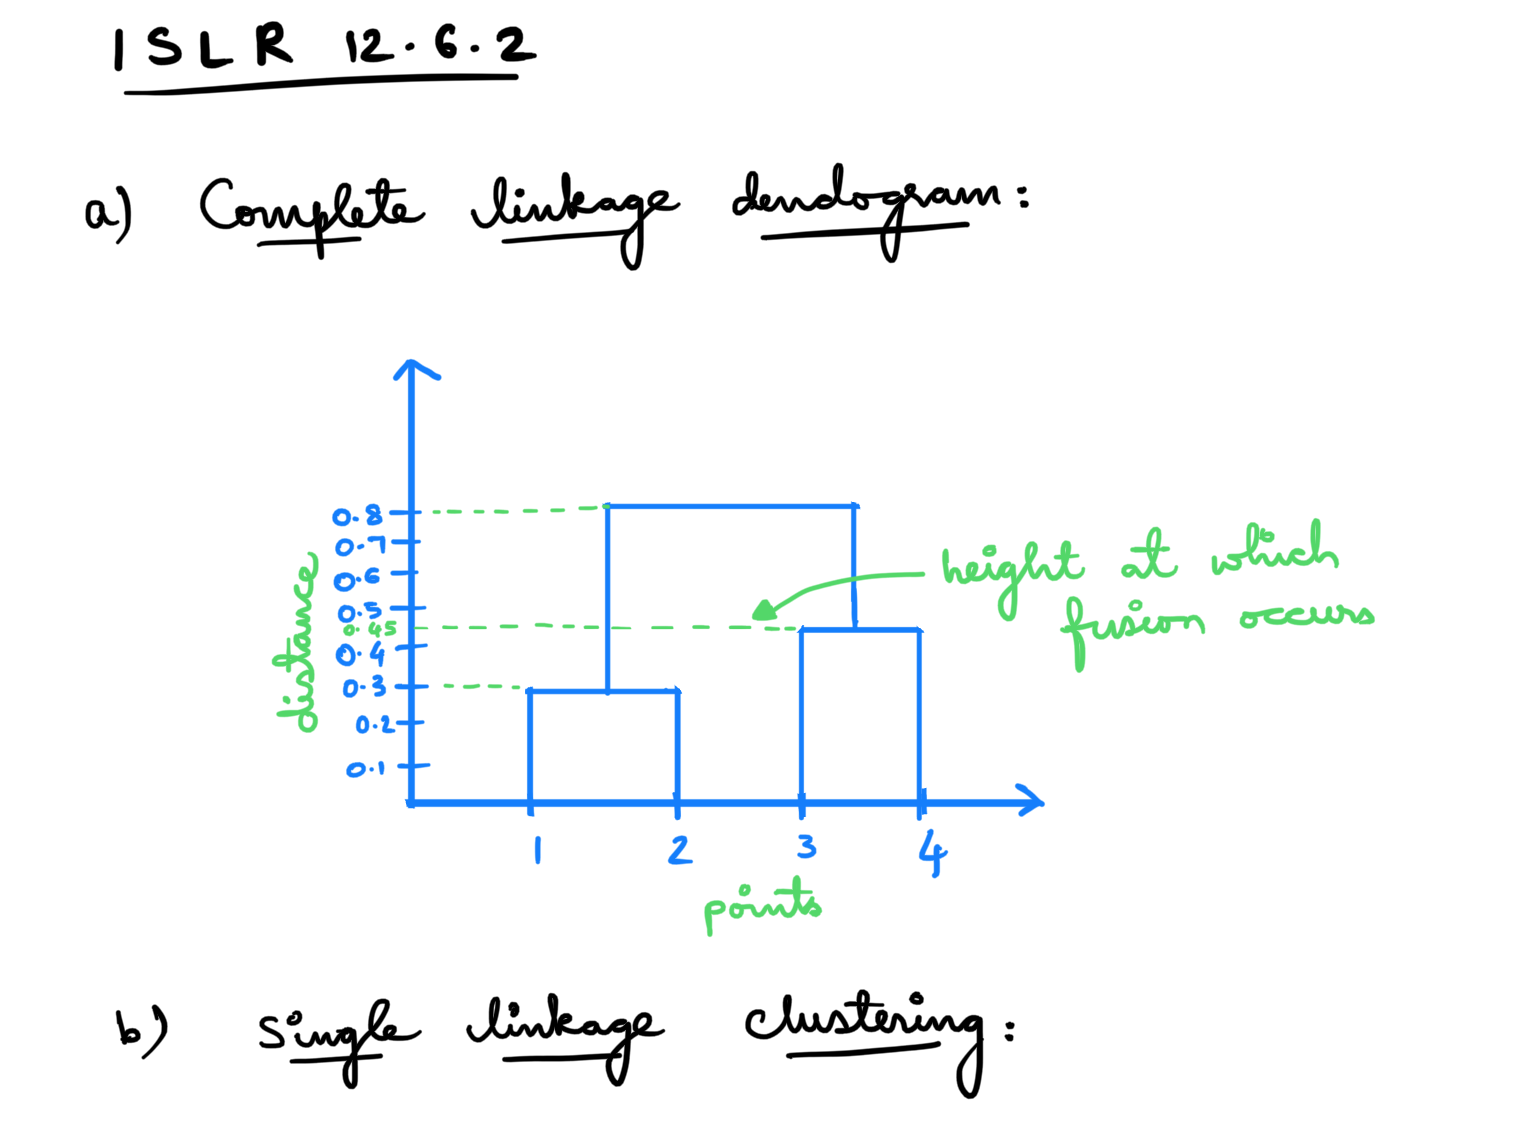

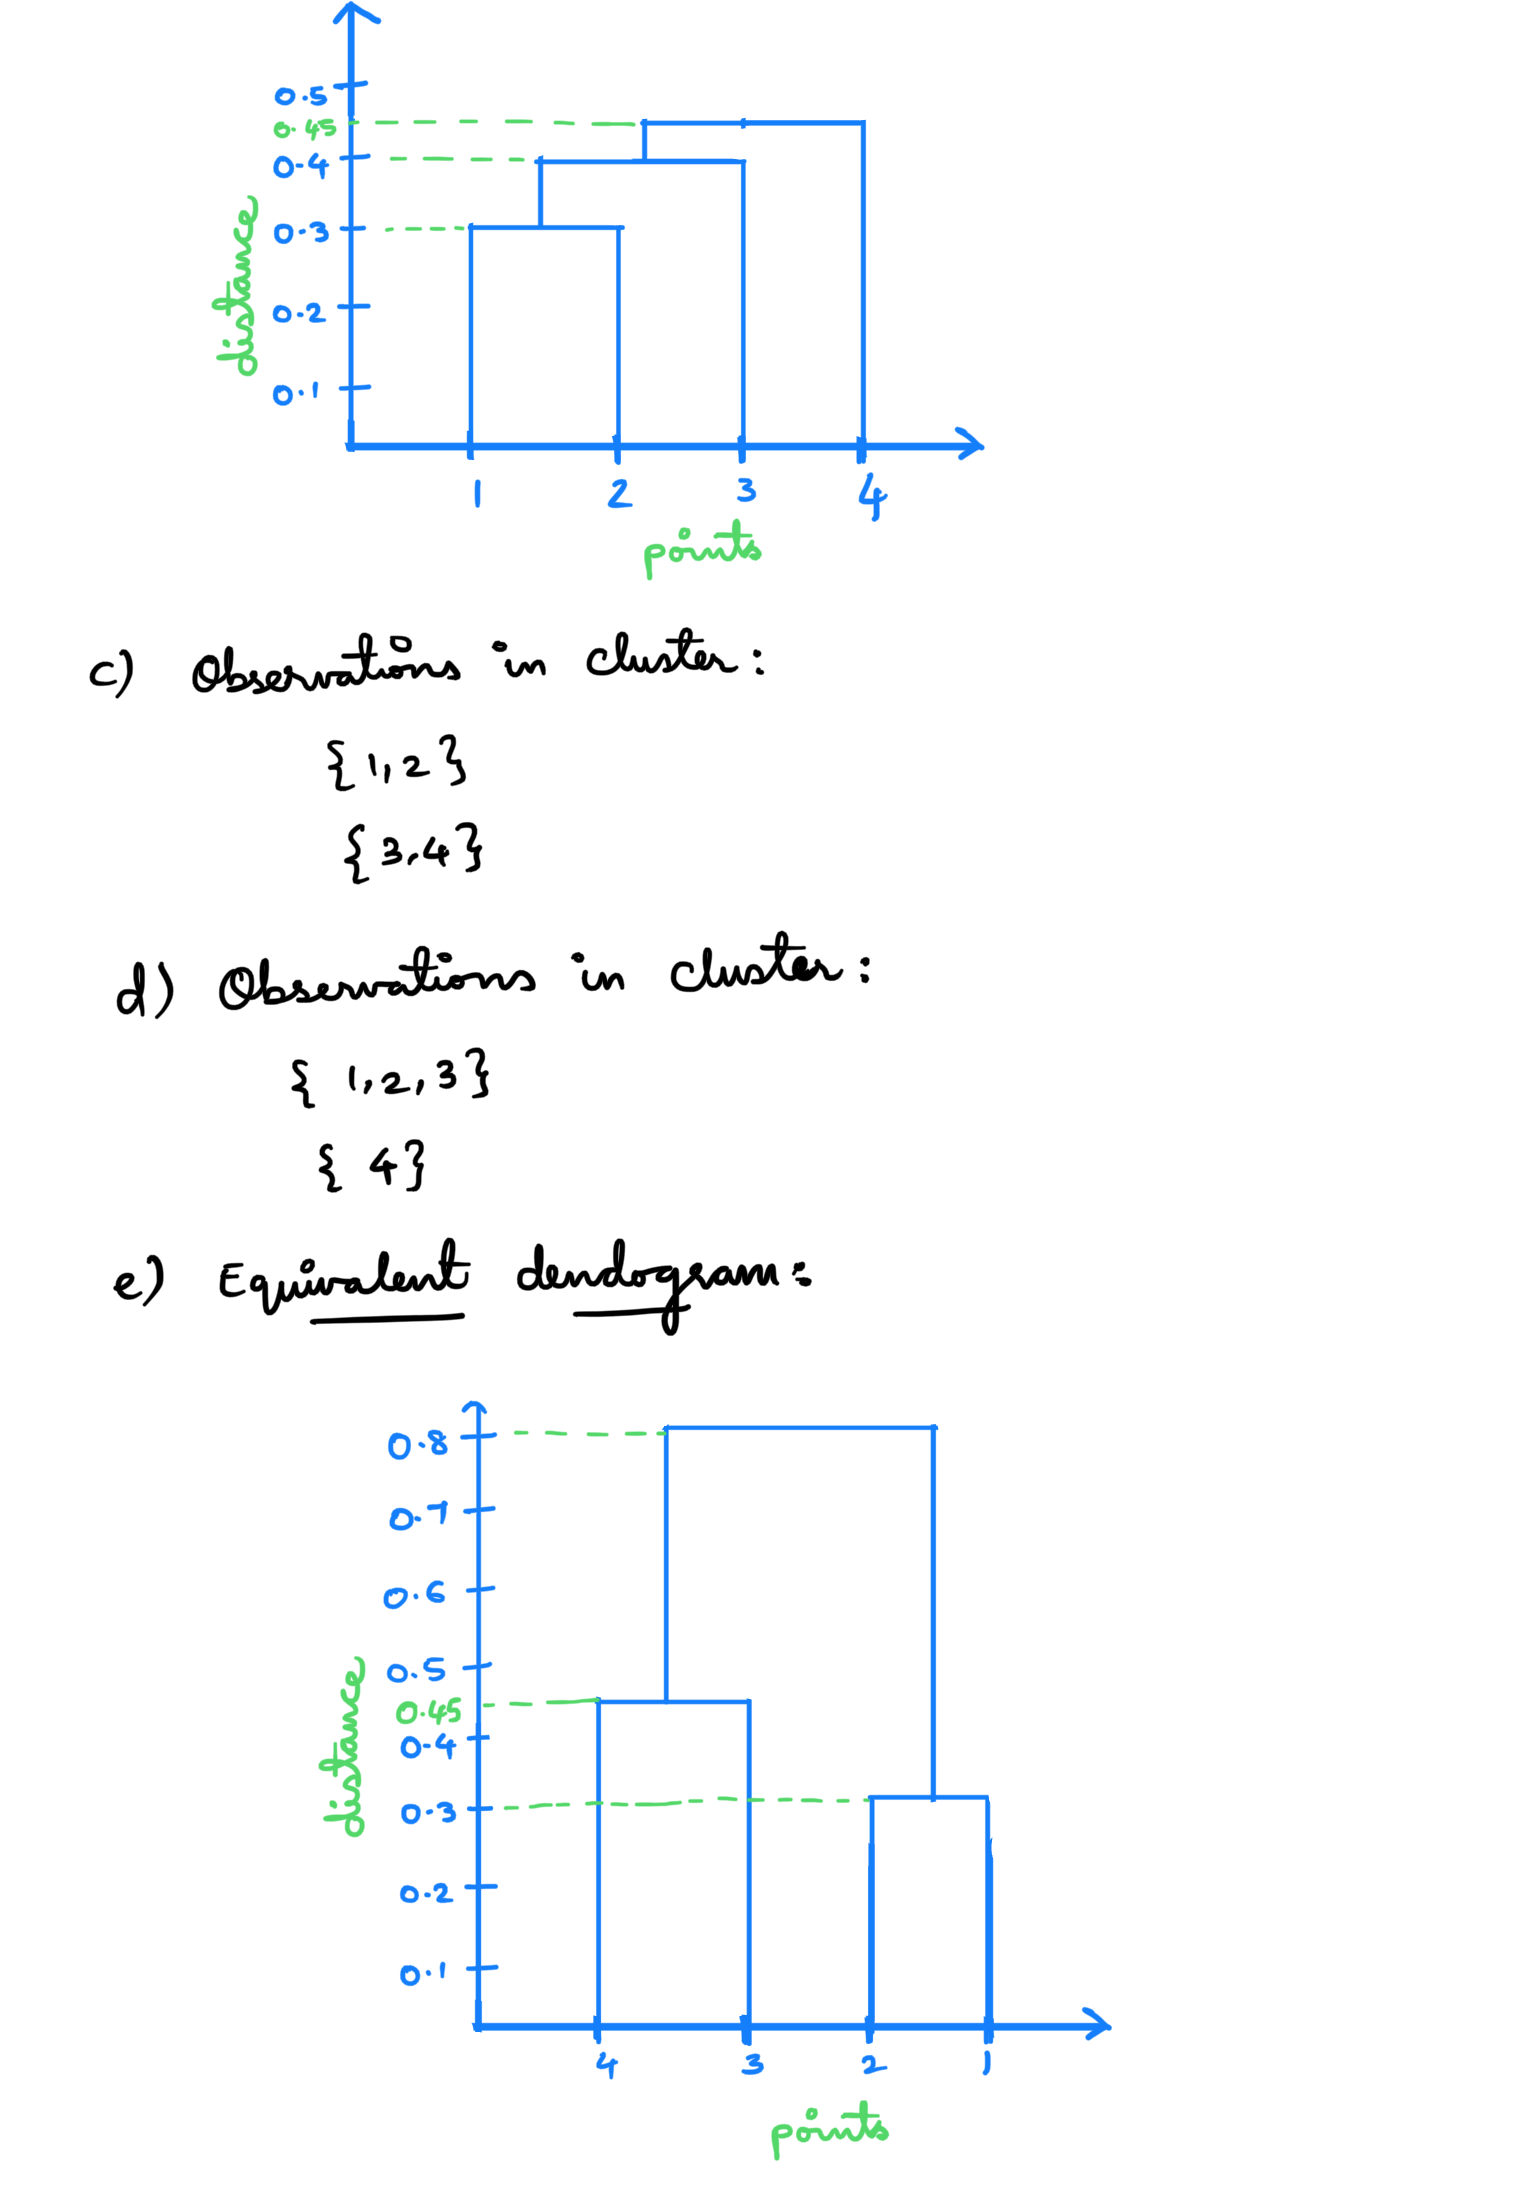

<center><b>Thank You</b></center>